In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('BTC-EUR.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-22,22942.826172,22972.332031,22263.158203,22807.732422,22807.732422,28475667565
1,2023-02-23,22809.501953,23132.164063,22337.939453,22597.166016,22597.166016,28757798964
2,2023-02-24,22595.763672,22725.429688,21807.943359,21916.640625,21916.640625,25330637326
3,2023-02-25,21918.527344,21926.546875,21623.605469,21920.429688,21920.429688,15228867492
4,2023-02-26,21919.269531,22421.406250,21834.210938,22325.521484,22325.521484,15771595568


In [4]:
X=df["Close"]
dates = df["Date"]

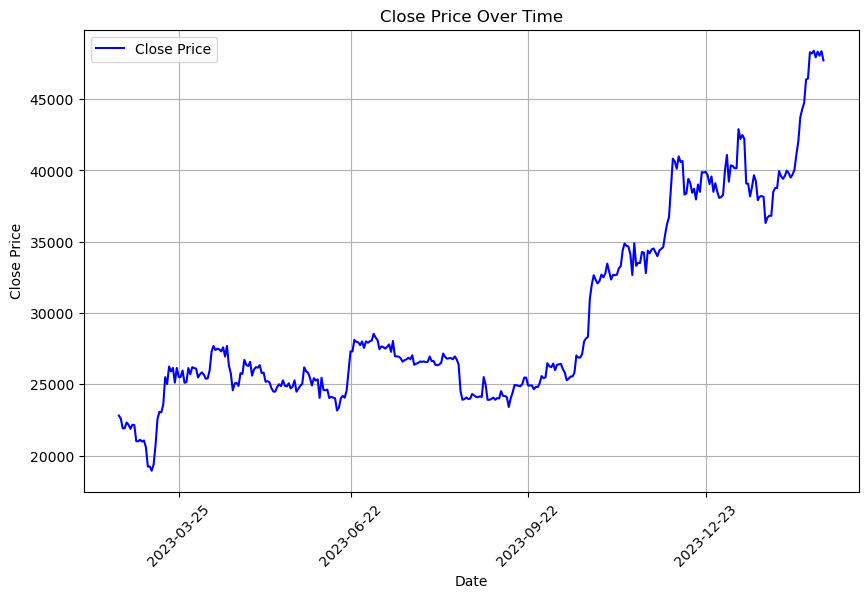

In [5]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
plt.plot(dates, X, label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Affiche une étiquette tous les 3 mois
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format simplifié (AAAA-MM)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [7]:
def create_sequences(df,seq_length):
    X=[]
    y=[]
    for i in range(len(df)-seq_length):
        X.append(df[i:i+seq_length])
        y.append(df[i+seq_length])
    return np.array(X),np.array(y)
seq_length=60

X,y=create_sequences(scaled_data,seq_length)

# implementation d'un RNN

In [9]:
model_rnn=Sequential([
    SimpleRNN(50,activation='tanh',input_shape=(60,1)),
    Dense(1,activation='sigmoid')
])

C:\Users\vPro\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_rnn.compile(optimizer='adam',loss='mse')

In [12]:
split=int(len(X)*0.8)
X_train,X_test= X[:split],X[split:]
y_train,y_test=y[:split],y[split:]

In [13]:
history_rnn=model_rnn.fit(X_train, y_train,epochs=15, validation_data=(X_test,y_test))

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 0.0502 - val_loss: 0.1357
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0308 - val_loss: 0.0890
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0258 - val_loss: 0.0675
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0105 - val_loss: 0.0561
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0090 - val_loss: 0.0473
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0069 - val_loss: 0.0360
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0054 - val_loss: 0.0287
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0062 - val_loss: 0.0247
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0055 - val_loss: 0.0225
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0044 - val_loss: 0.0209
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0048 - val_loss: 0.0207
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0060 - val_loss: 0.0195


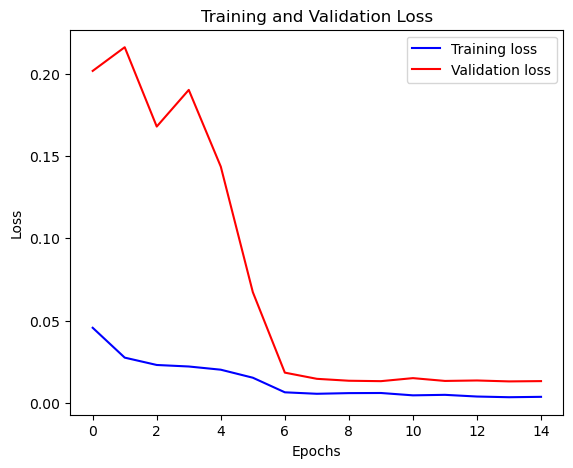

In [45]:
# Recuperer les valeurs de loss
loss=history_rnn.history['loss']
val_loss=history_rnn.history['val_loss']

# Tracer la courbe de loss
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(range(15),loss, 'b',label='Training loss')
plt.plot(range(15),val_loss,'r',label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [46]:
model_lstm=Sequential([
    LSTM(50, activation='tanh',input_shape=(60,1),return_sequences=True),
    LSTM(20, activation='tanh',input_shape=(60,50)),
    Dense(1, activation='sigmoid')
])

In [47]:
model_lstm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 20)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,101 (62.89 KB)

 Trainable params: 16,101 (62.89 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model_lstm.compile(optimizer='adam',loss='mse')

In [49]:
history_rnn=model_lstm.fit(X_train, y_train,epochs=15, validation_data=(X_test,y_test))

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - loss: 0.0553 - val_loss: 0.1610
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0365 - val_loss: 0.2622
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0263 - val_loss: 0.2342
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0211 - val_loss: 0.1713
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0233 - val_loss: 0.1855
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0223 - val_loss: 0.1795
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0204 - val_loss: 0.1306
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0134 - val_loss: 0.0555
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0064 - val_loss: 0.0263
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0052 - val_loss: 0.0169
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0037 - val_loss: 0.0140
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0042 - val_loss: 0.0147

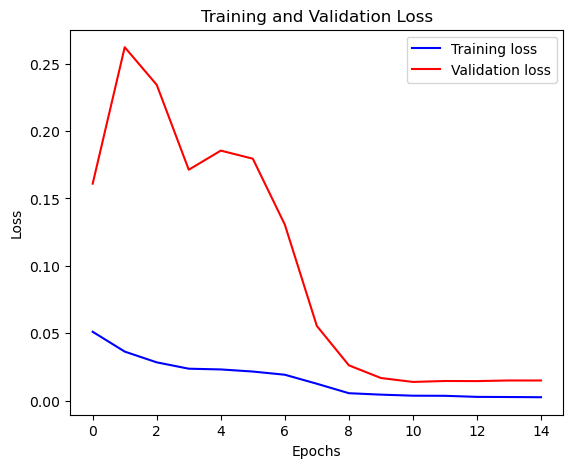

In [50]:
# Recuperer les valeurs de loss
loss=history_rnn.history['loss']
val_loss=history_rnn.history['val_loss']

# Tracer la courbe de loss
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(range(15),loss, 'b',label='Training loss')
plt.plot(range(15),val_loss,'r',label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()